In [245]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from scipy.stats import rayleigh
import seaborn as sns
from scipy.stats import norm
import datetime 

# Starting date: 22 Oct 2023 start 82kg

I plan to be 78Kg by 12 Nov; This means I aim to get rid of 4Kg of fat mass.

Therefore, I'll need a net deficit of $4\textit{Kg}$ $\times$ $\frac{3500\textit{Kcal}}{0.454\textit{Kg}}$ = $31,000\textit{Kcal}$. In other words the aim is to have at least a daily caloric deficit of 1400kcal for 22 days straight! How is this feasible? 

The balancing equation in terms of calories in and calories out is given below: 

$$
\textbf{deficit} = E_{in} * thermic\space{}discount - E_{exercise} - E_{non\space{}exercise} - E_{BMR}
$$

The question boils down to how can I optimise the above parameters in order to achieve an average daily deficit of -1400Kcal. 

I know that I can eat 1800Kcal in a day and feel fine. 

With $E_{in}$  at 1800 Kcal, effectively the intake is 1530 Kcal (thermic = 0.85 for a high protein diet). Subtract my $E_{BMR} = 2100Kcal$ and $E_{non\space{}exercise} = 150Kcal$; This leaves us with -720Kcal already!

The rest must come from either walking (roughly 65Kcal per Km), gym sesh or cardio (I prefer running on a treadmil). My iphone says that on average I walk 6.5Km per day which is around 423Kcal. 

Say I also go to the gym 4 times a week. This would contribute a further $150 * \frac{4}{7} = 85Kcal$ deficit. 

So far I would have an average daily deficit of 1228Kcal. We are missing 172Kcal! 

For good measure I plan to also run 5Km before every gym session which burns off a daily $5 * 65 * \frac{4}{7} = 185Kcal$. This means that I have exceeded my deficit goal by 13Kcal :).

Lets quantify the goal of losing 4kg in 22 days.

$\textbf{Goal: Eat 1800Kcal per day, walk 6.5Km daily, and go to the gym  at least 4 times a week for a 5Km treadmil session and a 4-6 set weight training Push-Pull-Legs routine.}$

This goal demands a very meticulous logging of daily caloric intake (weighing my portions and referencing the nutritional tables on tha back), distance walked and ran, and of when I've had a gym session.

In [246]:
cals = np.array([1597, 1778, 1781, 1791, 1792, 3338, 1779, 2979, 1807, 1866, 1841, 1825, 1906, 1786, 2795, 1814, 1800, 2665, 1793, 3891, 2220, 1704, 1796, 1798, 1919, 1785, 1830])# daily calories consumed in kcal

In [247]:
protein = np.array([189, 194, 175.6, 125, 162, 170, 180, 143, 165, 123, 152, 197, 149, 144, 170.3, 165, 159, 125.7, 188, 173, 125, 174, 200, 90, 166, 159, 162]) #daily protein intake in grams

In [248]:
walk_km = np.array([4.6, 6.2, 5.7, 6.7, 4.7, 9, 6.4, 10, 7.2, 6.1, 6.8, 5, 5.6, 4.9, 4, 13.9, 7.4, 6.5, 11.3, 4.6, 6.2, 4.8, 7.1, 9, 5.5, 6.2, 4.2]) #binary - assumes accurate iphone data        

In [249]:
run = np.array([0, 5, 5, 5, 0, 5, 0, 0, 5, 2.5, 5, 0, 0, 0, 2.5, 0, 5, 0, 5, 0, 0, 0, 5, 5, 0, 0, 5])

In [250]:
gym = np.array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]) #binary - assumes 4 - 6 sets

In [251]:
# let an entry be an object? OOP??? => Need to lvl up

In [252]:
#-----This is the section that needs to changing for a personalised notebook-----#
d = datetime.date(2023, 10, 22) # start date 
start = 82 # starting weight -------- NEEDS MEASUREMENT
yourbmr = 2100 # your basal metabolic rate (aka metabolism) ---- NEEDS MEASUREMENT
lean = 68 # lean mass --------- NEEDS MEASUREMENT (needed for fat percentages) 
goal_weight = 78 # goal weight 
target_kcal = 1800 # target intake 
deficit_kcal = 1400 # target deficit 

In [253]:
Dummy = np.ones(len(cals)) 
thermic = np.where(protein >= 120, 0.85, 0.9)
bmr = Dummy * yourbmr
neat = Dummy * 150 

deficit_kg = deficit_kcal * 0.454 / 3500 
deficit = thermic * cals - bmr - ((run + walk_km) * 65 + gym * 150) - neat 
maintenance = (1/thermic) * (bmr + ((run + walk_km) * 65 + gym * 150) + neat) 
maintenance = cals - deficit / thermic # maintenance - cals = - deficit / 0.85 and deficit = 0.85 * (cals - meaintenance)

loss_kg = deficit * 0.454 / 3500 
cum_loss_kg = np.cumsum(loss_kg) 
weight_now = Dummy * start + cum_loss_kg 
xaxis = np.array(range(1, len(protein) + 1))
xaxis_calc = np.array(range(0, len(walk_km)))

In [254]:
start_weight = weight_now[-1] 
bfperc = ((goal_weight - lean) / (goal_weight)) * 100 
D = (start_weight-goal_weight) / (np.mean(-loss_kg)) 
d_now = d + datetime.timedelta(days = len(cals)) 
goal_date = d_now + datetime.timedelta(days = D) 
day_of_week = goal_date.strftime('%A') 
date = goal_date.strftime('%d-%m-%Y') 
ideal_goal_date = d + datetime.timedelta((start - goal_weight) * 3500 / (0.454 * deficit_kcal))

In [255]:
weight_axis = np.linspace(goal_weight, start, 2)
D_vec = (start * np.ones(len(weight_axis))-weight_axis) / (np.mean(-loss_kg))
D_ideal = (start * np.ones(len(weight_axis))-weight_axis) / (deficit_kcal * 0.454 / 3500)

In [256]:
# Weight measurement vector from boditrax (link: https://www.better.org.uk/boditrax)
data = np.array([82, 81.2, 81.1, 80.4, 80.3, 79.2, 79.2, 78.5, 78.1])
x_data = np.array([datetime.date(2023, 10, 21), datetime.date(2023, 10, 23), datetime.date(2023, 10, 24), datetime.date(2023, 10, 30), datetime.date(2023, 11, 1), datetime.date(2023, 11, 5), datetime.date(2023, 11, 7), datetime.date(2023, 11, 13), datetime.date(2023, 11, 18)])
x_delay = np.zeros(len(data))
for i, el in enumerate(x_data):
    x_delay[i] = (el - datetime.date(2023, 10, 22)).days + 1

In [257]:
def even (arr):
    N = int(np.ceil(len(arr)/2))
    ret = np.zeros(N)
    for i in range(0, N):
        ret[i] = int(arr[i * 2])
    return ret

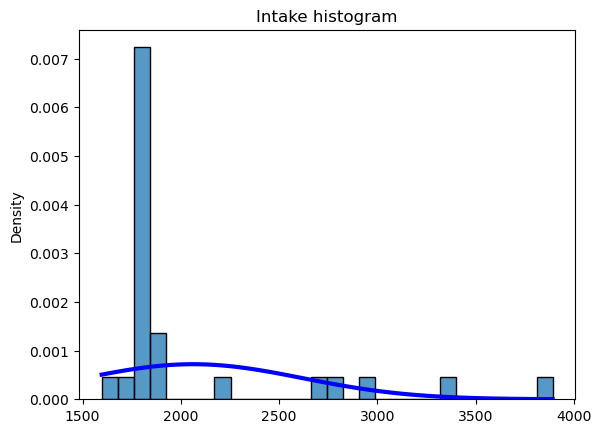

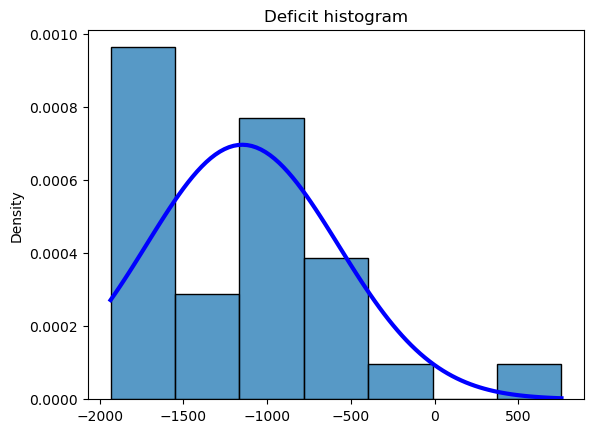

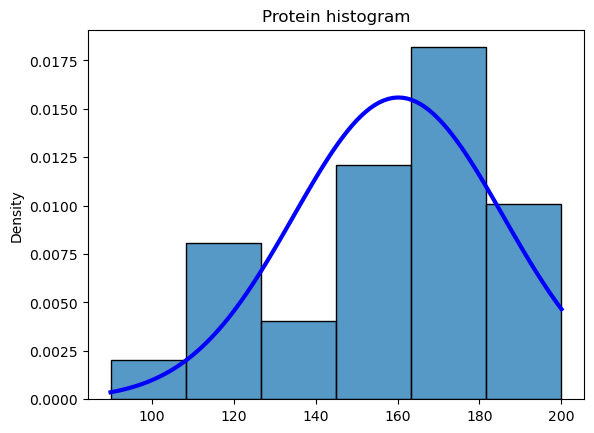

In [258]:
sns.histplot(cals, stat='density')
plt.title("Intake histogram")
x_axis_cals = np.linspace(min(cals), max(cals), 100)
plt.plot(x_axis_cals, (1 / np.sqrt(2 * np.pi * np.std(cals) * np.std(cals))) * np.exp(-0.5 * np.power((((x_axis_cals - np.mean(cals)) / np.std(cals)) ), 2)), linewidth = 3, color = "blue")
plt.show()
plt.close()

sns.histplot(deficit, stat='density')
plt.title("Deficit histogram")
x_axis_deficit = np.linspace(min(deficit), max(deficit), 100)
plt.plot(x_axis_deficit, (1 / np.sqrt(2 * np.pi * np.std(deficit) * np.std(deficit))) * np.exp(-0.5 * np.power((((x_axis_deficit - np.mean(deficit)) / np.std(deficit))), 2)), linewidth = 3, color = "blue")
plt.show()
plt.close()

sns.histplot(protein, stat='density')
plt.title("Protein histogram")
x_axis_protein = np.linspace(min(protein), max(protein), 100)
plt.plot(x_axis_protein, (1 / np.sqrt(2 * np.pi * np.std(protein) * np.std(protein))) * np.exp(-0.5 * np.power((((x_axis_protein - np.mean(protein)) / np.std(protein))), 2)), linewidth = 3, color = "blue")
plt.show()
plt.close()

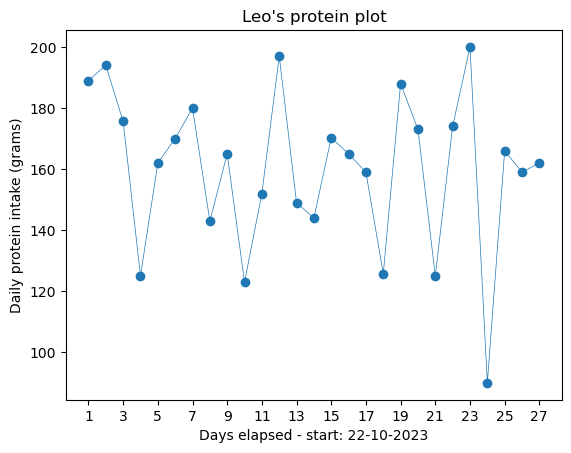

Average protein: 160g


In [259]:
plt.scatter(xaxis, protein)
plt.plot(xaxis, protein, linewidth = 0.5)
plt.title("Leo's protein plot")
plt.ylabel("Daily protein intake (grams)")
plt.xlabel("Days elapsed - start: " + d.strftime('%d-%m-%Y'))
plt.xticks(even(xaxis))
plt.show()
print("Average protein: " + str(int(np.round(np.mean(protein), 0))) + "g")

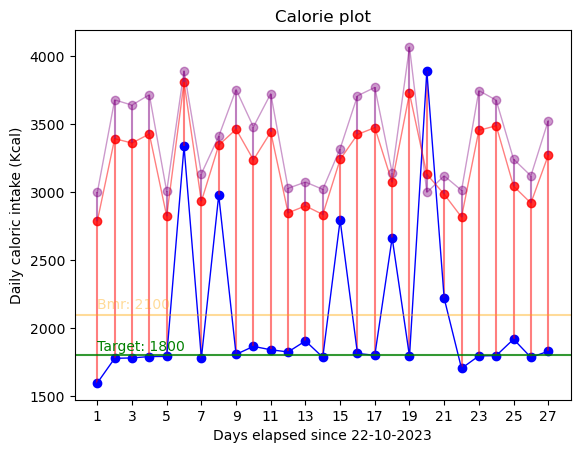

Average maintenance: 3409 Kcal
Average intake: 2062 Kcal
Average deficit: -1148 Kcal

Todays maintenance: 3527 Kcal
Todays intake: 1830 Kcal
Todays deficit: -1442 Kcal


In [260]:
# NOTE: deficit = 0.85 * (cals - maintenance)
plt.vlines(xaxis, thermic * cals + ((1 - thermic) * cals), thermic * maintenance + ((1 - thermic) * cals), linestyle = 'solid', colors = 'red', alpha=0.5)
plt.vlines(xaxis, thermic * maintenance + ((1 - thermic) * cals), maintenance, linestyle = 'solid', colors = 'purple', alpha=0.5)
plt.scatter(xaxis, cals, color = "blue", label = "Intake")
plt.scatter(xaxis, maintenance, color = 'purple', alpha=0.4, label = "Maintenance")
plt.scatter(xaxis, thermic * maintenance + ((1 - thermic) * cals), color = 'red', alpha=0.8, label = "Deficit")
plt.plot(xaxis, cals, linewidth = 1, color = "blue")
plt.plot(xaxis, maintenance, color = 'purple', linewidth = 1, alpha=0.4)
plt.plot(xaxis, thermic * maintenance + ((1 - thermic) * cals), linewidth = 1, color = 'red', alpha=0.5)
plt.axhline(bmr[0], color = 'orange', alpha=0.4)
plt.axhline(target_kcal, color = 'green', alpha=0.8)
plt.title("Calorie plot")
plt.ylabel("Daily caloric intake (Kcal)")
plt.xlabel("Days elapsed since " + d.strftime('%d-%m-%Y'))
plt.text(1.01, bmr[0] * 1.02, 'Bmr: ' + str(int(bmr[0])), color = 'orange', alpha = 0.4)
plt.text(1.01, target_kcal * 1.02, 'Target: ' + str(int(target_kcal)), color = 'green')
plt.xticks(even(xaxis))
#plt.legend(loc = "upper left")
plt.show()
print("Average maintenance: " + str(int(np.round(np.mean(maintenance), 0))) + " Kcal")
print("Average intake: " + str(int(np.round(np.mean(cals), 0))) + " Kcal")
print("Average deficit: " + str(int(np.round(np.mean(deficit), 0))) + " Kcal")
print("\nTodays maintenance: " + str(int(np.round(maintenance[-1], 0))) + " Kcal")
print("Todays intake: " + str(int(np.round(cals[-1], 0))) + " Kcal")
if int(np.round(deficit[-1], 0))  >= 0:
    print("Todays surplus: " + str(int(np.round(deficit[-1], 0))) + " Kcal")
else:
    print("Todays deficit: " + str(int(np.round(deficit[-1], 0))) + " Kcal")

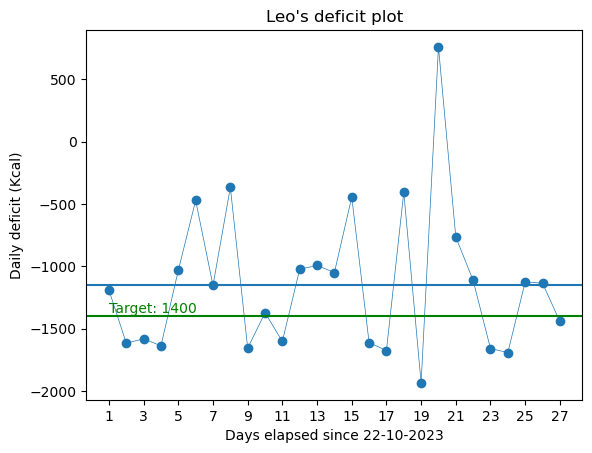

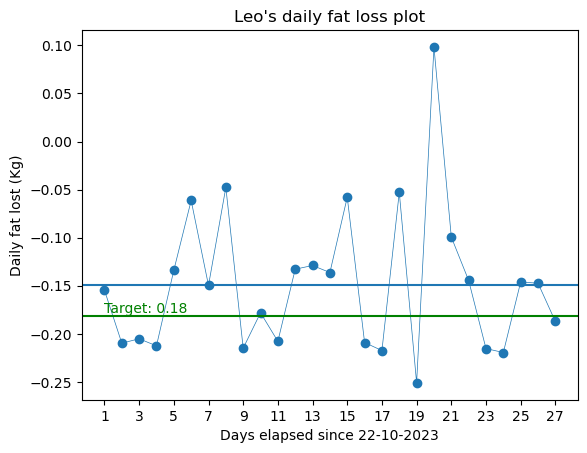

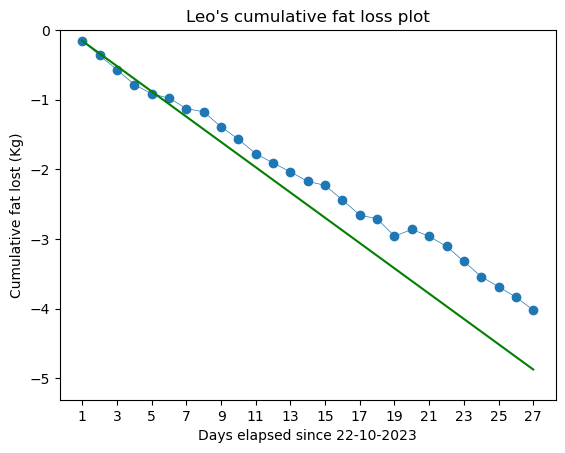

The green lines are the ideal rate I should have if I completely followed the goal statement in the beggining


In [261]:
plt.scatter(xaxis, deficit)
plt.plot(xaxis, deficit, linewidth = 0.5)
plt.axhline(-deficit_kcal, color = 'green')
#plt.ylim([-deficit_kcal * 1.3, -deficit_kcal * 0.2])
plt.axhline(np.mean(deficit))
plt.title("Leo's deficit plot")
plt.ylabel("Daily deficit (Kcal)")
plt.xlabel("Days elapsed since " + d.strftime('%d-%m-%Y'))
plt.text(1, -deficit_kcal * 0.98, 'Target: ' + str(int(deficit_kcal)), color = 'green')
plt.xticks(even(xaxis))
plt.show()

plt.scatter(xaxis, loss_kg)
plt.plot(xaxis, loss_kg, linewidth = 0.5)
plt.axhline(-deficit_kg, color = 'green')
plt.axhline(np.mean(loss_kg))
#plt.ylim([-deficit_kcal * 1.3 * 0.454 / 3500, -deficit_kcal * 0.2 * 0.454 / 3500])
plt.title("Leo's daily fat loss plot")
plt.ylabel("Daily fat lost (Kg)")
plt.xlabel("Days elapsed since " + d.strftime('%d-%m-%Y'))
plt.text(1, - deficit_kg * 0.98, 'Target: ' + str(round(deficit_kg, 2)), color = 'green')
plt.xticks(even(xaxis))
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom = 1.05 * (weight_now[0] - start - xaxis[-1] * deficit_kcal * 0.454/3500), top = 0)
plt.scatter(xaxis, cum_loss_kg)
plt.plot(xaxis, cum_loss_kg, linewidth = 0.5)
plt.plot(xaxis, weight_now[0] - start - xaxis_calc * deficit_kcal * 0.454/3500, color = "green")
plt.title("Leo's cumulative fat loss plot")
plt.ylabel("Cumulative fat lost (Kg)")
plt.xlabel("Days elapsed since " + d.strftime('%d-%m-%Y'))
plt.xticks(even(xaxis))
plt.show()
print("The green lines are the ideal rate I should have if I completely followed the goal statement in the beggining")


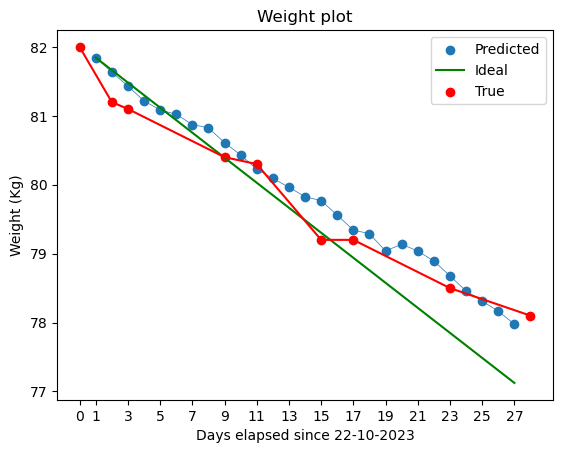

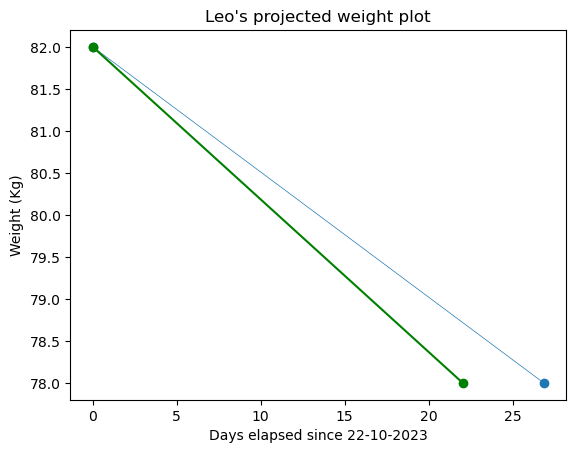

You'll be 4 days late keeping a 1148 average deficit!
Current weight estimate is: 77.98
Last weight measurement was: 78.1
The green lines are the ideal rate I should have if I completely followed the goal statement in the beggining


In [262]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(xaxis, weight_now, label = "Predicted")
plt.plot(xaxis, weight_now, linewidth = 0.5)
plt.plot(xaxis, weight_now[0] - xaxis_calc * deficit_kcal * 0.454/3500, color = "green", label = "Ideal")
plt.scatter(x_delay, data, color = "red", label = "True")
plt.plot(x_delay, data, color = "red")
#ax.set_ylim(bottom = None, top = start)
plt.title("Weight plot")
plt.ylabel("Weight (Kg)")
plt.xlabel("Days elapsed since " + d.strftime('%d-%m-%Y'))
plt.xticks(np.append([0], even(xaxis)))
plt.legend()
plt.show()

plt.plot(D_vec, weight_axis, linewidth = 0.5)
plt.scatter(D_vec, weight_axis)
plt.plot(D_ideal, weight_axis, color = "green")
plt.scatter(D_ideal, weight_axis, color = "green")
plt.title("Leo's projected weight plot")
plt.ylabel("Weight (Kg)")
plt.xlabel("Days elapsed since " + d.strftime('%d-%m-%Y'))
plt.show()
print("You'll be " + str(int(np.ceil(D_vec[0] - D_ideal[0])) - 1) + " days late keeping a " + str(-int(np.round(np.mean(deficit), 0))) + " average deficit!")
print("Current weight estimate is: " + str(np.round(weight_now[-1], 2)))
print("Last weight measurement was: " + str(data[-1]))
print("The green lines are the ideal rate I should have if I completely followed the goal statement in the beggining")


In [263]:
print("Current estimated weight: " + str(np.round(weight_now[-1], 2)) + "Kg")
print("Body fat percentage now: " + str(np.round(100 * (weight_now[-1] - lean) / weight_now[-1], 2)) + "%")
print("")

print("To reach", str(goal_weight - lean) + "Kg (fat) /", str(goal_weight),  "Kg, requires", int(abs(D) // 30), "month(s) and",  round(int(abs(D) % 30)), "day(s) given an average deficit of", int(-np.round(np.mean(deficit))), "Kcal. Your grand delay is " + str((goal_date - ideal_goal_date).days) +  " days (" + day_of_week + ", " + date + ").\n\nBody fat percentage will be", str(np.round(bfperc, 2)) + "%!")

Current estimated weight: 77.98Kg
Body fat percentage now: 12.8%

To reach 10Kg (fat) / 78 Kg, requires 0 month(s) and 0 day(s) given an average deficit of 1148 Kcal. Your grand delay is 4 days (Friday, 17-11-2023).

Body fat percentage will be 12.82%!


# Conclusion: I realise that I can consistently do a 1200 deficit at best when sticking to the routine defined in the start. Despite this, the math checked out and my grand delay was 4 days which I'm fine with. Next stop 85kg!